In [1]:
# Version de Python 3.11.8

# V0 Modelo pa estimación de fallo en bombas
Tarea de machine Learning. UCM 2023-204

In [2]:
from utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df1=pd.read_csv('./training set values.csv', sep=',')
# df_Y=pd.read_csv('./training set labels.csv', sep=',')
# df_all_1 = pd.merge(df1, df_Y, on='id', how='inner')

df1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
df1.id.value_counts()

id
69572    1
27851    1
6924     1
61097    1
48517    1
        ..
59036    1
56446    1
3855     1
52786    1
26348    1
Name: count, Length: 59400, dtype: int64

In [5]:
df1.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

Esto al final no lo implemento. Solo pueblo con ello como primera toma de contacto

In [6]:
if 'df2' in globals():
    del df2
df2 = df1
df2['district_code'] = df1['region_code'].astype(str) + df1['district_code'].astype(str)
df2['district_code'] = pd.to_numeric(df2['district_code'])



In [7]:
pd.set_option('display.max_columns', None)  # Configurar para mostrar todas las columnas
df2.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,115,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,202,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,214,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,9063,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,181,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [8]:
#Paso a numerica date_recorded:
df2['date_recorded'] = pd.to_datetime(df2['date_recorded'], format='%Y-%m-%d')

In [9]:
# Lista de variables numéricas
lista_de_numericas = [
    'amount_tsh',
    'date_recorded',
    'gps_height',
    'longitude',
    'latitude',
    'num_private',
    'region_code',
    'district_code',
    'population',
    'construction_year'
]

# Lista de variables categóricas
lista_de_categoricas = [
    'funder',
    'installer',
    'wpt_name',
    'basin',
    'subvillage',
    'region',
    'lga',
    'ward',
    'public_meeting',
    'recorded_by',
    'scheme_management',
    'scheme_name',
    'permit',
    'extraction_type',
    'extraction_type_group',
    'extraction_type_class',
    'management',
    'management_group',
    'payment',
    'payment_type',
    'water_quality',
    'quality_group',
    'quantity',
    'quantity_group',
    'source',
    'source_type',
    'source_class',
    'waterpoint_type',
    'waterpoint_type_group',
    'status_group'
]

In [10]:
# tarda 4-5'
# Analizamos las numéricas, excepto la de tipo datatime
if 0:
    for ln in lista_de_numericas:
        if (ln != 'date_recorded'):
            print("------", ln.upper(), "------")
            print(df1[ln].describe())
            resultados_outliers = gestiona_outliers(df1[ln])
            print("Atípicos inferiores:", resultados_outliers[0])
            print("Atípicos superiores:", resultados_outliers[1])
            print("% valores atípicos:", resultados_outliers[2])
            print("missings: ", (df1[ln].isnull().sum()))
            print("ceros: ", (df1[ln] == 0).sum())
            histogram_boxplot(df1[ln], xlabel = None, title = ln, font_scale=1, figsize=(6,3), bins = None)



Trataremos las columnas numéricas de esta manera:

Num	    'id',			    ok

        'amount_tsh',		truncar los limites	

        'gps_height',		quitar -90 y 0	ceros: 20438 

        'longitude',		quitar 0	ceros: 1812 

        'latitude',		    debe haber -1	PENDIENTE

        'num_private',		Si != 0 es 1	

        'region_code',	    Ver que hacer más adelante

        'district_code_mod',eliminar, no aporta

        'population',		Estudiar la distribución. winsorizar outlayers?

        'construction_year'	quitar 0. ceros: 20709 	

        'date_recorded',	ok		


Analizamos las categóricas

In [11]:
#añadimos target. Creamos df3
df_target = pd.read_csv("./training set labels.csv")
df3 =pd.merge(df2, df_target, on='id', how='inner')

In [12]:
# Creo una funcion para analizarlas rapidamente

# Ejemplo de uso:


for lc in lista_de_categoricas:
    mostrar_categoricas(df3, lc)


NameError: name 'mostrar_categoricas' is not defined

<Axes: >

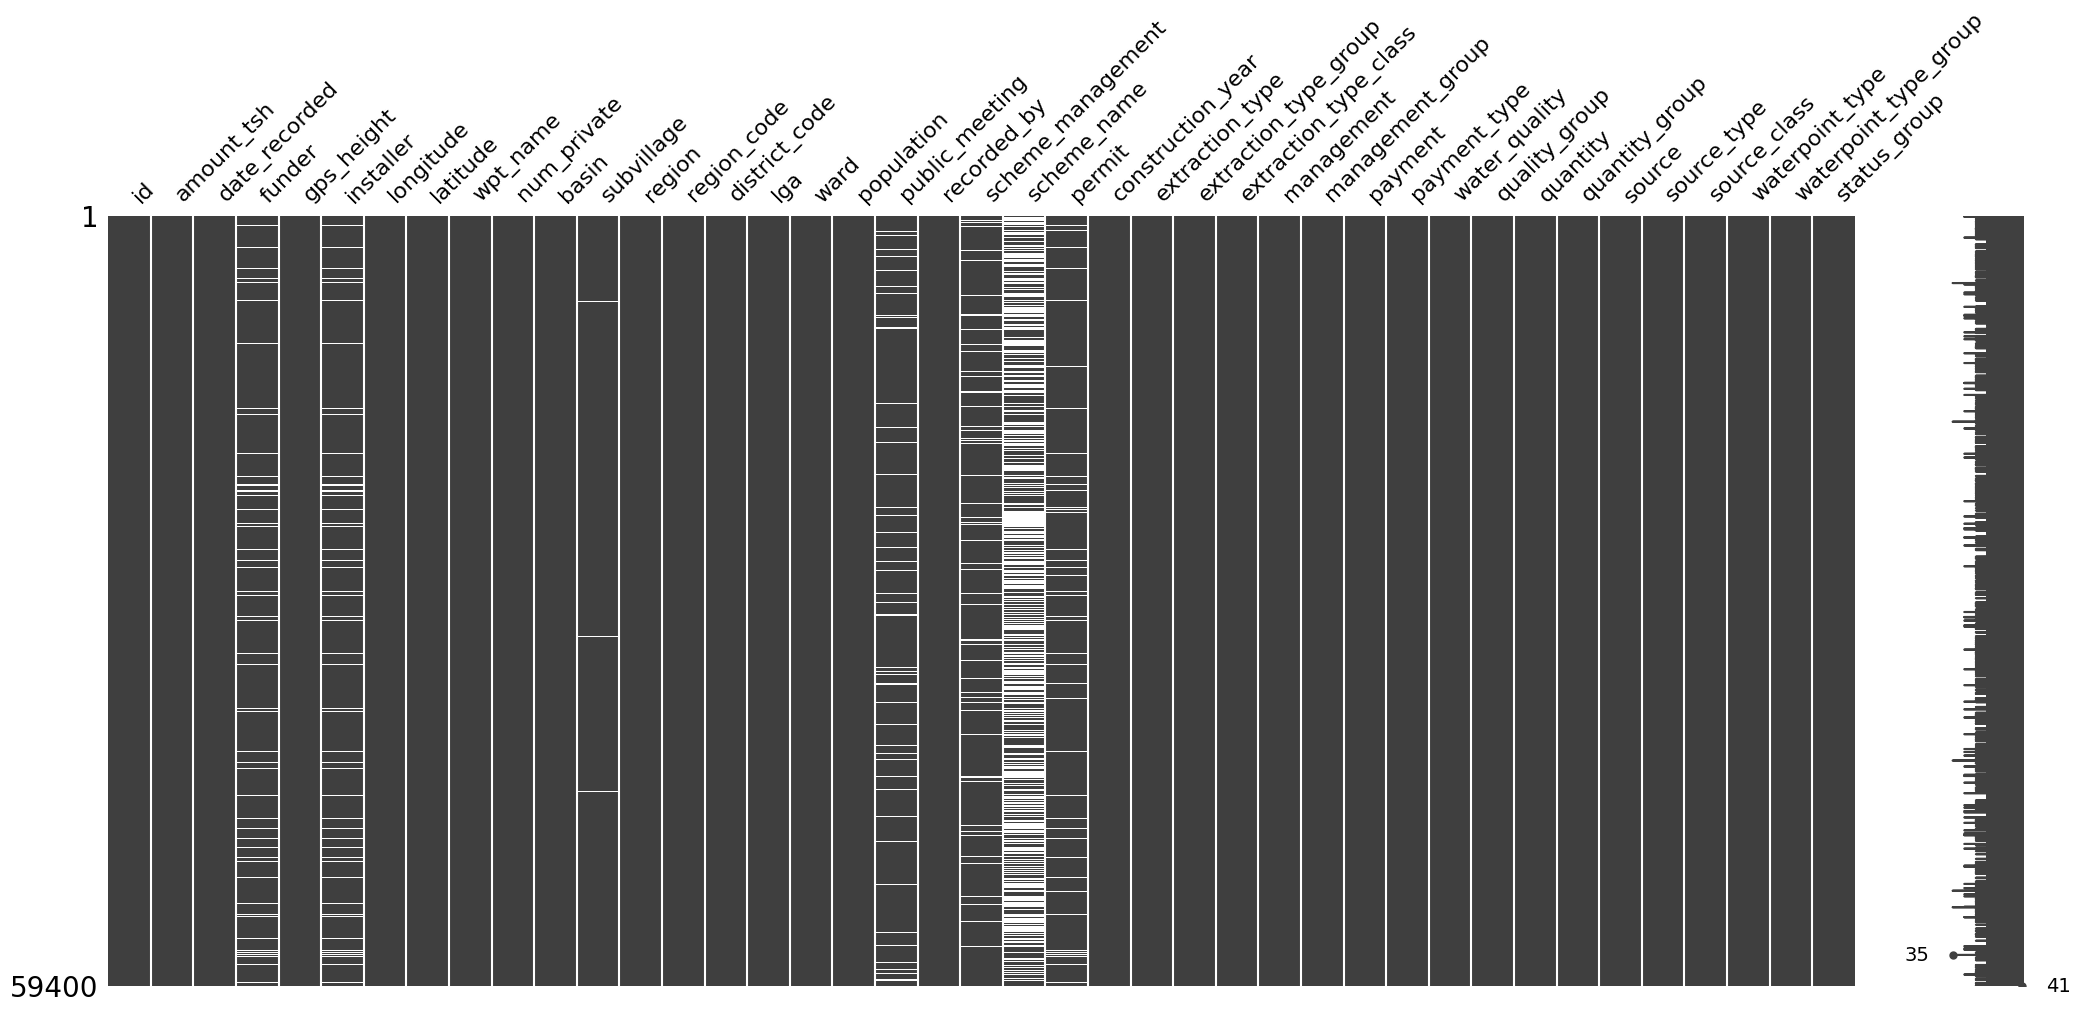

In [ ]:
import missingno as msno   

msno.matrix(df3.sort_values(by='id'))


<Axes: >

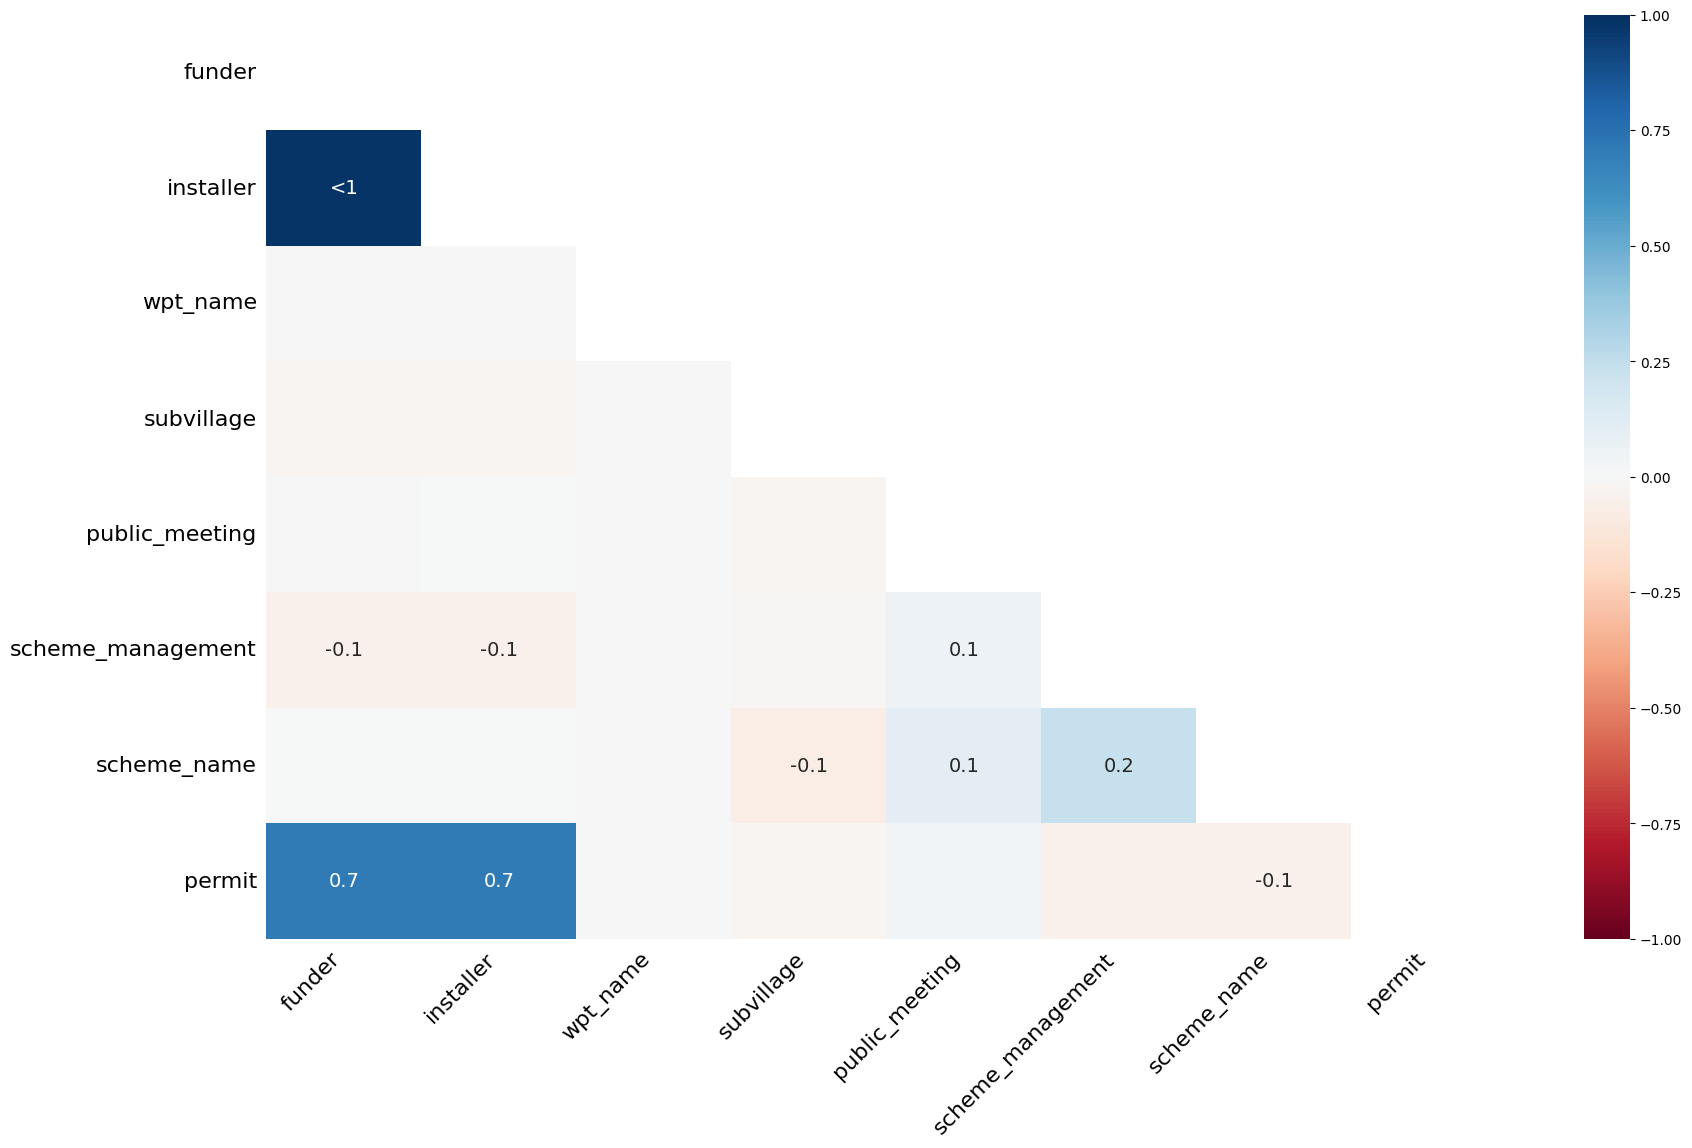

In [ ]:
#Mostramos el patron que siguen los perdidos. 
msno.heatmap(df1)

In [ ]:
# pruebo a imputar por multivariante